In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

#### 데이터 불러오기

In [2]:
df=pd.read_csv('공공임대주택.csv',encoding='cp949')

#### 값 변경

In [3]:
rental_type_map = {
    1: "Private rental housing",
    2: "Public rental housing",
    3: "Conversion to public rental housing",
    4: "Other rental housing"
}
sido_map = {
    11: "Seoul",
    21: "Busan",
    22: "Daegu",
    23: "Incheon",
    24: "Gwangju",
    25: "Daejeon",
    26: "Ulsan",
    29: "sejong-si",
    31: "Gyeonggi-do",
    32: "Gangwon-do",
    33: "Chungcheongbuk-do",
    34: "Chungcheongnam-do",
    35: "Jeollabuk-do",
    36: "Jeollanam-do",
    37: "Gyeongsangbuk-do",
    38: "Gyeongsangnam-do",
    39: "Jeju"
}
house_type_map = {
    1: 'general detached house',
    2: 'multi-family detached house',
    3: 'detached house for commercial use',
    4: 'apartment',
    5: 'row house',
    6: 'multi-family housing',
    7: 'housing in non-residential buildings',
    8: 'Officetels',
    9: 'dorm',
    10: 'shack·greenhouse·container·hut',
    11: 'etc'
}
occupancy_type_map = {
    1: 'jaga',
    2: 'Jeonse',
    3: 'monthly rent with deposit',
    4: 'monthly rent without deposit',
    5: 'sageulse or Yonsei',
    6: 'ilse',
    7: 'musang'
}
yes_no_map = {
    1: 'Yes',
    2: 'No'
}
housing_satisfaction_map = {
    1: 'very unsatisfied',
    2: 'slightly dissatisfied',
    3: 'generally satisfied',
    4: 'very good'
}
yes_no_map_38 = {
    1: 'Yes',
    2: 'No'
}
rent_intent_map = {
    1: 1,
    2: 0
}
gender_map = {
    1: 'male',
    2: 'female'
}
yes_no_map_48 = {
    1: 'Yes',
    2: 'No'
}
housing_fee_burden_map = {
    1: 'very burdensome',
    2: 'a little burdensome',
    3: 'not too burdensome',
    4: 'not burdensome at all'
}
yes_no_map_53 = {
    1: 'Yes',
    2: 'No'
}
education_map = {
    1: 'elementary school graduation or less',
    2: 'middle School graduation',
    3: 'high school graduation',
    4: 'college graduation',
    5: 'graduate school graduate or higher'
}

In [4]:
replace_dict = {
    "문14. 현재 살고 계신 임대주택은 어떤 유형입니까?_1) 유형": rental_type_map,
    "시도": sido_map,
    "문4. 귀 댁의 주택 유형은 무엇입니까?": house_type_map,
    "문7. 귀 댁의 점유형태는 어디에 해당됩니까?": occupancy_type_map,
    "문8. 귀 댁은 가구주께서 가구주가 된 이후에 지금까지 한 번이라도 자가주택을 마련한 적이 있습니까?": yes_no_map,
    "문9. 귀 가구는 지금 사는 곳 이외에 가구주나 가구원의 이름으로 보유한 주택이 있습니까?": yes_no_map,

    # 문24(1) ~ (14)
    "문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_11) 자동차 경적, 집주변의 소음 정도": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_13) 대기오염 정도": housing_satisfaction_map,
    "문24. 현재주택 주거환경 만족도_14) 이웃과의 관계": housing_satisfaction_map,

    # 문25
    "문25. 주택에 대한 전반적인 만족도": housing_satisfaction_map,

    # 문38
    "문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?": yes_no_map_38,

    # 문41
    "문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?": rent_intent_map,

    # 가구 구성원 성별
    "가구 구성원 No.1_성별": gender_map,

    # 문48
    "문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?": yes_no_map_48,

    # 문51
    "문51. 귀 댁이 현재 거주하고 있는 주택의 주거관리비 부담 정도는 어느 정도 입니까?": housing_fee_burden_map,

    # 문53
    "문53. 현재 귀 가구는 부채가 있습니까?": yes_no_map_53,

    # 배문1
    "배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.": education_map
}


df = df.replace(replace_dict)

#### 예측에 사용할 독립 변수와 종속 변수 선택

In [5]:
new_df=df[['문3. 귀 댁의 가구주께서는 가구주가 된 이후, 언제부터 현재주택에 살았습니까?_년도','시도',
           '문4. 귀 댁의 주택 유형은 무엇입니까?',
          '문7. 귀 댁의 점유형태는 어디에 해당됩니까?','문8. 귀 댁은 가구주께서 가구주가 된 이후에 지금까지 한 번이라도 자가주택을 마련한 적이 있습니까?',
          '문9. 귀 가구는 지금 사는 곳 이외에 가구주나 가구원의 이름으로 보유한 주택이 있습니까?',
          '문14. 현재 살고 계신 임대주택은 어떤 유형입니까?_1) 유형','문21. 귀 댁이 거주하시는 곳의 주택면적은 얼마입니까?_1)주택사용면적(전용면적)_㎡',
          '문24. 현재주택 주거환경 만족도_1) 상업시설 접근용이성(시장/대형마트/백화점 등)',
          '문24. 현재주택 주거환경 만족도_2) 의료시설 접근용이성(병원/의료복지시설 등)',
          '문24. 현재주택 주거환경 만족도_3) 공공기관 접근용이성(시청/읍면동사무소/경찰서 등)',
          '문24. 현재주택 주거환경 만족도_4) 문화시설 접근용이성(극장/공연장/박물관/미술관 등)',
          '문24. 현재주택 주거환경 만족도_5) 도시공원 및 녹지 접근용이성(놀이터/공원/녹지/수변 등)',
          '문24. 현재주택 주거환경 만족도_6) 대중교통 접근용이성(버스/지하철 등)',
          '문24. 현재주택 주거환경 만족도_7) 주차시설 이용편의성',
           '문24. 현재주택 주거환경 만족도_8) 주변도로의 보행 안전',
          '문24. 현재주택 주거환경 만족도_9) 교육환경(학교/학원 및 미취학 아동을 위한 시설/서비스 등)',
          '문24. 현재주택 주거환경 만족도_10) 치안 및 범죄 등 방범 상태',
           '문24. 현재주택 주거환경 만족도_12) 청소 및 쓰레기 처리상태',
           '문24. 현재주택 주거환경 만족도_14) 이웃과의 관계',
          '문25. 주택에 대한 전반적인 만족도',
          '문38. 귀 가구는 내 집을 보유해야 한다고 생각하십니까?','문41. 귀 가구는 공공임대주택 입주 기회를 준다면 입주할 의향이 있으십니까?',
          '가구 구성원 No.1_우리나라나이','가구 구성원 No.1_성별',
          '문46-1. 귀 댁의 가구원수는 총 몇 명입니까? 귀하를 포함하여 실제로 이 가구에서 함께 살고 있는 인원을 말씀해주십시오.',
          '문48. 귀 가구는 국민기초생활보장급여(맞춤형 급여) 수급가구입니까?',
           '문49. 지난 1년간의 월평균 가구 소득_1) 근로/사업소득(만원)','문49. 지난 1년간의 월평균 가구 소득_2) 재산소득(만원)',
           '문49. 지난 1년간의 월평균 가구 소득_3) 사회보험 수혜금(만원)','문49. 지난 1년간의 월평균 가구 소득_4) 정부 보조금(만원)',
           '문49. 지난 1년간의 월평균 가구 소득_5) 사적이전소득(만원)','문49. 지난 1년간의 월평균 가구 소득_6) 월평균 총 경상소득(만원)',
           '문50. 귀 가구의 다음 생활비는 얼마입니까? 지난 1년간의 평균 금액으로 말씀해 주십시오._1) 월평균 총 생활비(만원)',
           '문51. 귀 댁이 현재 거주하고 있는 주택의 주거관리비 부담 정도는 어느 정도 입니까?',
           '문52. 귀 가구의 총 자산은 어느 정도입니까?_1) 총 부동산 자산(만원)',
           '문52. 귀 가구의 총 자산은 어느 정도입니까?_2) 총 금융자산(만원)','문52. 귀 가구의 총 자산은 어느 정도입니까?_3) 총 기타자산(만원)',
           '문52. 귀 가구의 총 자산은 어느 정도입니까?_4) 총 자산(만원)',
          '문53. 현재 귀 가구는 부채가 있습니까?','배문1. 가구주께서는 학교를 어디까지 마치셨습니까? 최종 졸업 학력 기준으로 응답해 주십시오.']]

#### 컬럼면 변경

In [6]:
new_df.columns=['Length of residence','what area do you live in?','What is the housing type?','Type of occupancy','Have you ever owned your own home?',
                'Do you own a home in the name of the head of household or household member?','Rental housing type','Housing size(㎡)',
                'Ease of access to commercial facilities','Ease of access to medical facilities','Ease of access to public institutions',
                'Ease of access to cultural facilities','Ease of access to city parks and green spaces','Ease of access to public transportation',
                'Convenience of using parking facilities','Pedestrian safety on surrounding roads',
                'Educational environment','Safety from crime','Cleanliness','Neighbor interactions',
                'Overall satisfaction with the housing',
                'Do you think I should own my home?','Intention to move into public rental housing', 'Age','Gender',
                'Number of household members','National Basic Livelihood Security Benefits',
                'Average monthly earned/business income','Average monthly Property income','Average monthly social insurance benefits',
                'Average monthly government subsidies','Average monthly private transfer income','Average Gross Ordinary Income per Month',
                'Average monthly cost of living','Burden of Housing management fee','Total real estate assets','Total financial assets',
                'Total other assets','Total assets','Are you in debt?','Education level']

#### 클래스 균형 확인

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1700\111651027.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['No', 'Yes'])


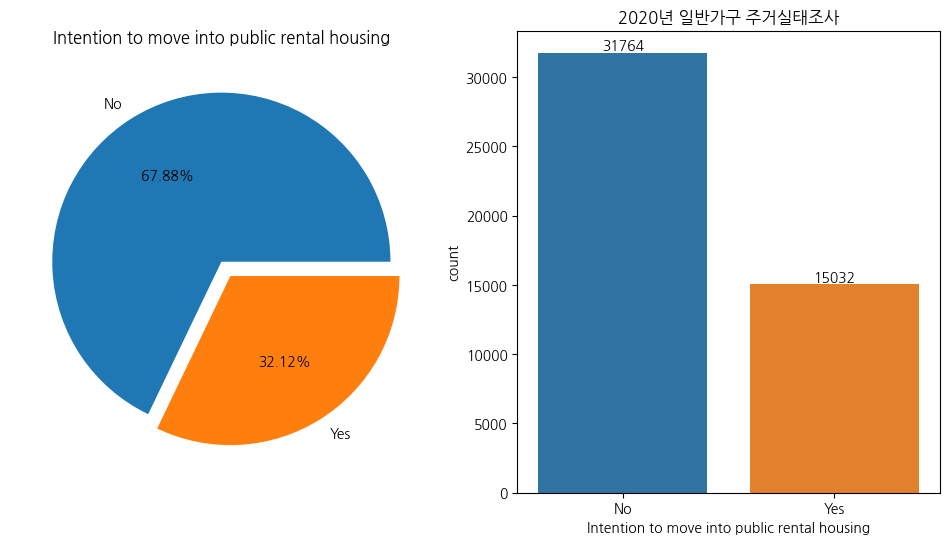

In [7]:
f, ax = plt.subplots(1, 2, figsize=(12, 6))

new_df['Intention to move into public rental housing'].value_counts().plot.pie(
    explode=[0, 0.1], 
    autopct='%1.2f%%', 
    labels=['No', 'Yes'], 
    ax=ax[0]
)
ax[0].set_title('Intention to move into public rental housing')
ax[0].set_ylabel('')

ax5 = sns.countplot(
    x='Intention to move into public rental housing', 
    data=new_df, 
    hue='Intention to move into public rental housing', 
    ax=ax[1], 
    legend=False
)
ax[1].set_title('2020년 일반가구 주거실태조사')
ax[1].set_xticklabels(['No', 'Yes'])

for container in ax5.containers:
    ax5.bar_label(container)

plt.show()

클래스(0, 1)가 불균형한 것을 확인할 수 있다.

#### 소득 수준별 공공임대주택 입주의향 확인

In [ ]:
## 가구원수별 소득 수준 분류
def social_1(income):
    if income < 1317895:
        return "서민층"
    elif 1317895 <=income <= 3514388:
        return "중산층"
    elif income > 3514388:
        return "상류층"
def social_2(income):
    if income < 2243985:
        return "서민층"
    elif 2243985 <=income <= 5983960:
        return "중산층"
    elif income > 5983960:
        return "상류층"
def social_3(income):
    if income < 2902932:
        return "서민층"
    elif 2902932 <=income <= 7741154:
        return "중산층"
    elif income > 7741154:
        return "상류층"
def social_4(income):
    if income < 3561880:
        return "서민층"
    elif 3561880 <=income <= 9498348:
        return "중산층"
    elif income > 9498348:
        return "상류층"
def social_5(income):
    if income < 4220828:
        return "서민층"
    elif 4220828 <=income <= 11255542:
        return "중산층"
    elif income > 11255542:
        return "상류층"
def social_6(income):
    if income < 4879776:
        return "서민층"
    elif 4879776 <=income <= 13012736:
        return "중산층"
    elif income > 13012736:
        return "상류층"

#### 수도권 - 서울

In [ ]:
seoul=class_classifier[(class_classifier['what area do you live in?']=='Seoul')]
seoul_1=seoul[(seoul['Number of household members']==1)]
seoul_2=seoul[(seoul['Number of household members']==2)]
seoul_3=seoul[(seoul['Number of household members']==3)]
seoul_4=seoul[(seoul['Number of household members']==4)]
seoul_5=seoul[(seoul['Number of household members']==5)]
seoul_6=seoul[(seoul['Number of household members']==6)]

seoul_1['서울시 소득 계층']=seoul_1['monthly average income'].apply(social_1)
seoul_2['서울시 소득 계층']=seoul_2['monthly average income'].apply(social_2)
seoul_3['서울시 소득 계층']=seoul_3['monthly average income'].apply(social_3)
seoul_4['서울시 소득 계층']=seoul_4['monthly average income'].apply(social_4)
seoul_5['서울시 소득 계층']=seoul_5['monthly average income'].apply(social_5)
seoul_6['서울시 소득 계층']=seoul_6['monthly average income'].apply(social_6)

In [ ]:
seoul_all=pd.concat([seoul_1,seoul_2,seoul_3,seoul_4,seoul_5,seoul_6],axis=0)
seoul_all=seoul_all.replace({'Intention to move into public rental housing':1},'Yes')
seoul_all=seoul_all.replace({'Intention to move into public rental housing':0},'No')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))

seoul_all['서울시 소득 계층'].value_counts().plot.pie(explode=[0.05]*3,autopct='%1.2f%%',ax=ax[0])
ax[0].set_xlabel('서울시 소득 계층')
ax[0].set_ylabel('')


ax13=sns.countplot('서울시 소득 계층',hue='Intention to move into public rental housing',data=seoul_all,ax=ax[1])
ax13.bar_label(ax13.containers[0])
ax13.bar_label(ax13.containers[1])
plt.legend(loc='best')
plt.title("서울시 소득 계층별 공공임대주택 입주의향")
plt.show()

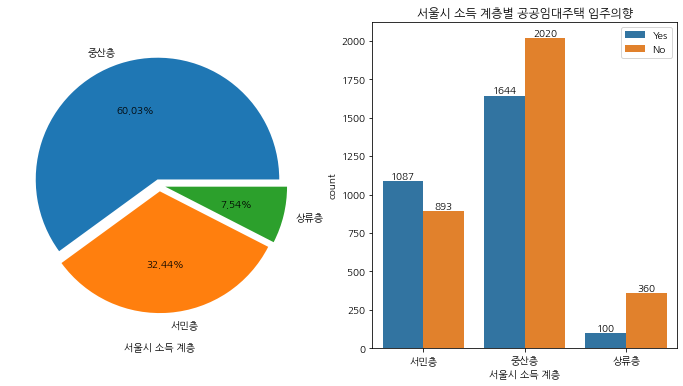

#### 수도권 - 경기도

In [ ]:
Gyeonggi_do=class_classifier[(class_classifier['what area do you live in?']=='Gyeonggi-do')]
Gyeonggi_do_1=Gyeonggi_do[(Gyeonggi_do['Number of household members']==1)]
Gyeonggi_do_2=Gyeonggi_do[(Gyeonggi_do['Number of household members']==2)]
Gyeonggi_do_3=Gyeonggi_do[(Gyeonggi_do['Number of household members']==3)]
Gyeonggi_do_4=Gyeonggi_do[(Gyeonggi_do['Number of household members']==4)]
Gyeonggi_do_5=Gyeonggi_do[(Gyeonggi_do['Number of household members']==5)]
Gyeonggi_do_6=Gyeonggi_do[(Gyeonggi_do['Number of household members']==6)]

Gyeonggi_do_1['경기도 소득 계층']=Gyeonggi_do_1['monthly average income'].apply(social_1)
Gyeonggi_do_2['경기도 소득 계층']=Gyeonggi_do_2['monthly average income'].apply(social_2)
Gyeonggi_do_3['경기도 소득 계층']=Gyeonggi_do_3['monthly average income'].apply(social_3)
Gyeonggi_do_4['경기도 소득 계층']=Gyeonggi_do_4['monthly average income'].apply(social_4)
Gyeonggi_do_5['경기도 소득 계층']=Gyeonggi_do_5['monthly average income'].apply(social_5)
Gyeonggi_do_6['경기도 소득 계층']=Gyeonggi_do_6['monthly average income'].apply(social_6)

In [ ]:
Gyeonggido_all=pd.concat([Gyeonggi_do_1,Gyeonggi_do_2,Gyeonggi_do_3,Gyeonggi_do_4,Gyeonggi_do_5,Gyeonggi_do_6],axis=0)
Gyeonggido_all=Gyeonggido_all.replace({'Intention to move into public rental housing':1},'Yes')
Gyeonggido_all=Gyeonggido_all.replace({'Intention to move into public rental housing':0},'No')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))

Gyeonggido_all['경기도 소득 계층'].value_counts().plot.pie(explode=[0.05]*3,autopct='%1.2f%%',ax=ax[0])
ax[0].set_xlabel('경기도 소득 계층')
ax[0].set_ylabel('')

ax13=sns.countplot('경기도 소득 계층',hue='Intention to move into public rental housing',data=Gyeonggido_all,ax=ax[1])
ax13.bar_label(ax13.containers[0])
ax13.bar_label(ax13.containers[1])
plt.legend(loc='best')
plt.title("경기도 소득 계층별 공공임대주택 입주의향")
plt.show()

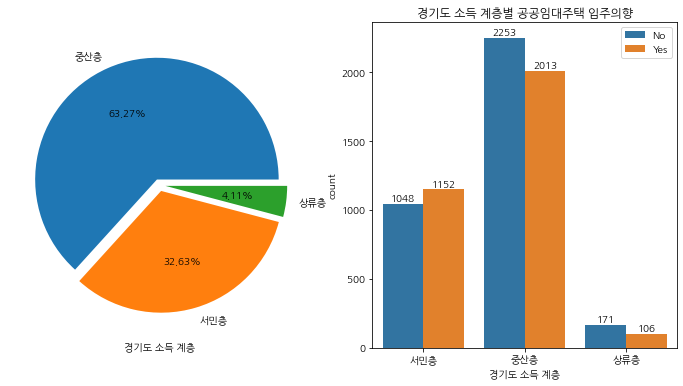

#### 수도권 - 인천

In [ ]:
incheon=class_classifier[(class_classifier['what area do you live in?']=='Incheon')]
incheon_1=incheon[(incheon['Number of household members']==1)]
incheon_2=incheon[(incheon['Number of household members']==2)]
incheon_3=incheon[(incheon['Number of household members']==3)]
incheon_4=incheon[(incheon['Number of household members']==4)]
incheon_5=incheon[(incheon['Number of household members']==5)]
incheon_6=incheon[(incheon['Number of household members']==6)]

incheon_1['인천시 소득 계층']=incheon_1['monthly average income'].apply(social_1)
incheon_2['인천시 소득 계층']=incheon_2['monthly average income'].apply(social_2)
incheon_3['인천시 소득 계층']=incheon_3['monthly average income'].apply(social_3)
incheon_4['인천시 소득 계층']=incheon_4['monthly average income'].apply(social_4)
incheon_5['인천시 소득 계층']=incheon_5['monthly average income'].apply(social_5)
incheon_6['인천시 소득 계층']=incheon_6['monthly average income'].apply(social_6)

In [ ]:
Incheon_all=pd.concat([incheon_1,incheon_2,incheon_3,incheon_4,incheon_5,incheon_6],axis=0)
Incheon_all=Incheon_all.replace({'Intention to move into public rental housing':1},'Yes')
Incheon_all=Incheon_all.replace({'Intention to move into public rental housing':0},'No')

In [ ]:
f,ax=plt.subplots(1,2,figsize=(12,6))

Incheon_all['인천시 소득 계층'].value_counts().plot.pie(explode=[0.05]*3,autopct='%1.2f%%',ax=ax[0])
ax[0].set_xlabel('인천시 소득 계층')
ax[0].set_ylabel('')

ax15=sns.countplot('인천시 소득 계층',hue='Intention to move into public rental housing',data=Incheon_all,ax=ax[1])
ax15.bar_label(ax15.containers[0])
ax15.bar_label(ax15.containers[1])
plt.legend(loc='best')
plt.title("인천시 소득 계층별 공공임대주택 입주의향")
plt.show()

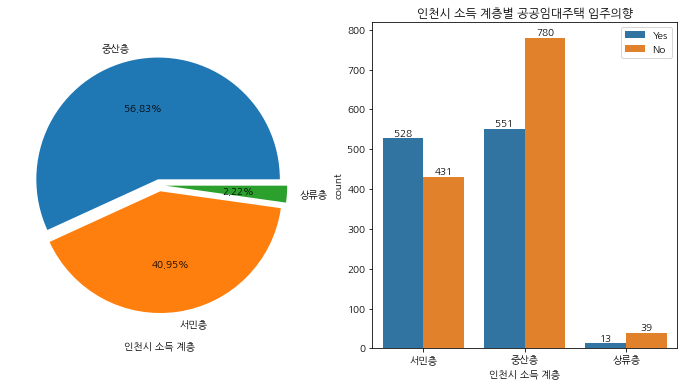

#### 비수도권

In [ ]:
Busan=class_classifier[(class_classifier['what area do you live in?']=='Busan')]
Daegu=class_classifier[(class_classifier['what area do you live in?']=='Daegu')]
Gwangju=class_classifier[(class_classifier['what area do you live in?']=='Gwangju')]
Daejeon=class_classifier[(class_classifier['what area do you live in?']=='Daejeon')]
Ulsan=class_classifier[(class_classifier['what area do you live in?']=='Ulsan')]
sejong_si=class_classifier[(class_classifier['what area do you live in?']=='sejong-si')]
Gangwon_do=class_classifier[(class_classifier['what area do you live in?']=='Gangwon-do')]
Chungcheongbuk_do=class_classifier[(class_classifier['what area do you live in?']=='Chungcheongbuk-do')]
Chungcheongnam_do=class_classifier[(class_classifier['what area do you live in?']=='Chungcheongnam-do')]
Jeollabuk_do=class_classifier[(class_classifier['what area do you live in?']=='Jeollabuk-do')]
Jeollanam_do=class_classifier[(class_classifier['what area do you live in?']=='Jeollanam-do')]
Gyeongsangbuk_do=class_classifier[(class_classifier['what area do you live in?']=='Gyeongsangbuk-do')]
Gyeongsangnam_do=class_classifier[(class_classifier['what area do you live in?']=='Gyeongsangnam-do')]
Jeju=class_classifier[(class_classifier['what area do you live in?']=='Jeju')]

In [ ]:
non_metropolitan_area=pd.concat([Busan,Daegu,Gwangju,Daejeon,Ulsan,sejong_si,Gangwon_do,Chungcheongbuk_do,Chungcheongnam_do,Jeollabuk_do,Jeollanam_do,Gyeongsangbuk_do,Gyeongsangnam_do,Jeju],axis=0)
non_metropolitan_area_1=non_metropolitan_area[(non_metropolitan_area['Number of household members']==1)]
non_metropolitan_area_2=non_metropolitan_area[(non_metropolitan_area['Number of household members']==2)]
non_metropolitan_area_3=non_metropolitan_area[(non_metropolitan_area['Number of household members']==3)]
non_metropolitan_area_4=non_metropolitan_area[(non_metropolitan_area['Number of household members']==4)]
non_metropolitan_area_5=non_metropolitan_area[(non_metropolitan_area['Number of household members']==5)]
non_metropolitan_area_6=non_metropolitan_area[(non_metropolitan_area['Number of household members']>=6)]

non_metropolitan_area_1['비수도권 경제 계층']=non_metropolitan_area_1['monthly average income'].apply(social_1)
non_metropolitan_area_2['비수도권 경제 계층']=non_metropolitan_area_2['monthly average income'].apply(social_2)
non_metropolitan_area_3['비수도권 경제 계층']=non_metropolitan_area_3['monthly average income'].apply(social_3)
non_metropolitan_area_4['비수도권 경제 계층']=non_metropolitan_area_4['monthly average income'].apply(social_4)
non_metropolitan_area_5['비수도권 경제 계층']=non_metropolitan_area_5['monthly average income'].apply(social_5)
non_metropolitan_area_6['비수도권 경제 계층']=non_metropolitan_area_6['monthly average income'].apply(social_6)

In [ ]:
non_metropolitan_area_all=pd.concat([non_metropolitan_area_1,non_metropolitan_area_2,non_metropolitan_area_3,non_metropolitan_area_4,non_metropolitan_area_5,non_metropolitan_area_6],axis=0)

f,ax=plt.subplots(1,2,figsize=(12,6))
non_metropolitan_area_all['비수도권 경제 계층'].value_counts().plot.pie(explode=[0.05]*3,autopct='%1.2f%%',ax=ax[0])
ax[0].set_xlabel('비수도권 경제 계층')
ax[0].set_ylabel('')
ax30=sns.countplot(x='비수도권 경제 계층',hue='Intention to move into public rental housing',data=non_metropolitan_area_all,ax=ax[1])
ax30.bar_label(ax30.containers[0])
ax30.bar_label(ax30.containers[1])
plt.legend(('Yes','No'),loc='best')
plt.title("비수도권 경제 계층별 공공임대주택 입주의향")
plt.show()

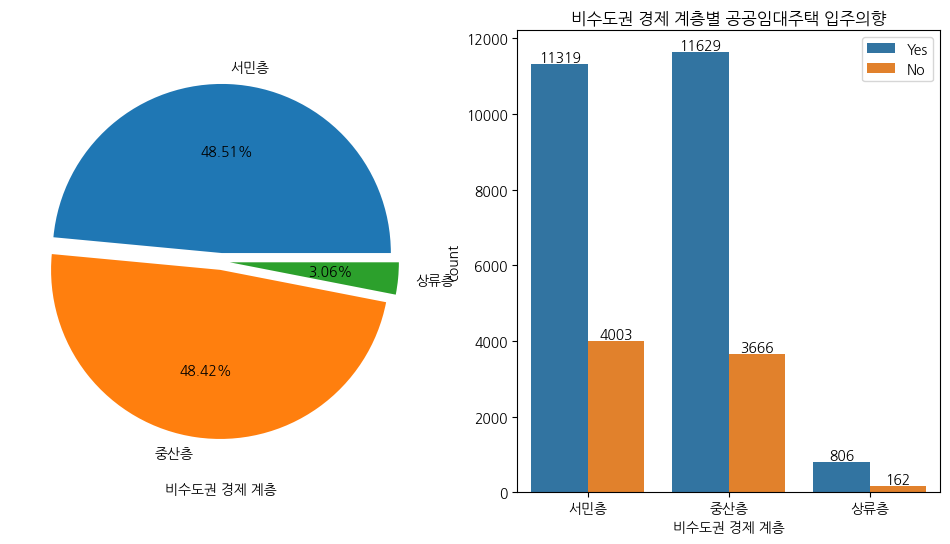

#### RobustScaler 적용
컬럼별(독립변수별)로 값의 차이가 큼.
- 예를 들어, 가구원수나 나이 값은 소득, 자산 등 차이가 큼. 소득, 자산 등이 outlier가 될 수 있음
- 그러므로 평균과 분산 대신 중앙값(median)과 사분위값을 사용하는 RobustScaler를 사용해 outlier 영향을 최소화

In [35]:
new_df.dtypes

Length of residence                                                              int64
what area do you live in?                                                       object
What is the housing type?                                                       object
Type of occupancy                                                               object
Have you ever owned your own home?                                              object
Do you own a home in the name of the head of household or household member?     object
Rental housing type                                                             object
Housing size(㎡)                                                                float64
Ease ofccess to commercial facilities                                           object
Ease of access to medical facilities                                            object
Ease of access to public institutions                                           object
Ease of access to cultural facilities      

In [36]:
# 숫자형 변수
num = new_df.select_dtypes(include=['int64', 'float64'])

# 범주형 변수
cat = new_df.select_dtypes(include=['object', 'category'])

In [37]:
num = num.drop('Intention to move into public rental housing', axis = 1)

In [38]:
## 종속 변수
a=new_df[['Intention to move into public rental housing']]

In [39]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(num)
num_scaled=scaler.transform(num)
num_df_scaled=pd.DataFrame(data=num_scaled, columns=num.columns)
num_df_scaled

,Length of residence,Housing size(㎡),Age,Number of household members,Average monthly earned/business income,Average monthly Property income,Average monthly social insurance benefits,Average monthly government subsidies,Average monthly private transfer income,Average Gross Ordinary Income per Month,Average monthly cost of living,Total real estate assets,Total financial assets,Total other assets,Total assets
0,-2.916667,-0.551966,1.32,1.0,-0.270270,0.0,0.0,1.000000,0.0,-0.378430,-0.533333,-0.407407,0.937500,-0.133333,-0.385714
1,-0.416667,-0.273876,1.24,0.0,-0.675676,0.0,0.0,1.666667,0.0,-0.870388,-0.866667,-0.407407,3.750000,-0.133333,0.096429
2,0.166667,-0.366573,1.16,-0.5,-0.675676,0.0,0.0,2.333333,0.0,-0.794702,-0.733333,-0.407407,1.458333,-0.133333,-0.296429
3,-1.833333,-0.830056,1.08,1.5,-0.602703,8.0,0.0,0.833333,0.0,-0.832545,-0.800000,1.074074,-0.416667,-0.133333,0.810714
4,-1.750000,-0.551966,1.24,2.0,-0.135135,0.0,0.0,1.600000,0.0,-0.121097,0.333333,0.444444,-0.416667,-0.133333,0.203571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46791,0.416667,-1.015449,-1.04,0.0,0.135135,0.0,0.0,0.000000,0.0,0.075686,-0.866667,-0.407407,-0.354167,-0.133333,-0.607143
46792,-2.250000,0.467697,0.68,1.0,-0.405405,0.0,10.0,0.000000,0.0,-0.643330,-0.533333,0.296296,-0.416667,-0.133333,0.060714
46793,-0.833333,1.765449,-0.12,1.0,0.135135,0.0,10.0,0.400000,20.0,0.234626,0.133333,0.777778,-0.312500,1.866667,0.650000
46794,0.000000,0.189607,-0.12,0.5,0.000000,0.0,10.0,0.500000,20.0,0.056764,0.000000,0.592593,-0.312500,1.200000,0.435714


In [43]:
cat_dummies=pd.get_dummies(cat).astype(np.float32)

In [44]:
## 데이터 합치기
comp=pd.concat([num_df_scaled,cat_dummies,a],axis=1)

In [46]:
comp

,Length of residence,Housing size(㎡),Age,Number of household members,Average monthly earned/business income,Average monthly Property income,Average monthly social insurance benefits,Average monthly government subsidies,Average monthly private transfer income,Average Gross Ordinary Income per Month,...,Burden of Housing management fee_not too burdensome,Burden of Housing management fee_very burdensome,Are you in debt?_No,Are you in debt?_Yes,Education level_college graduation,Education level_elementary school graduation or less,Education level_graduate school graduate or higher,Education level_high school graduation,Education level_middle School graduation,Intention to move into public rental housing
0,-2.916667,-0.551966,1.32,1.0,-0.270270,0.0,0.0,1.000000,0.0,-0.378430,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,-0.416667,-0.273876,1.24,0.0,-0.675676,0.0,0.0,1.666667,0.0,-0.870388,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,0.166667,-0.366573,1.16,-0.5,-0.675676,0.0,0.0,2.333333,0.0,-0.794702,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,-1.833333,-0.830056,1.08,1.5,-0.602703,8.0,0.0,0.833333,0.0,-0.832545,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
4,-1.750000,-0.551966,1.24,2.0,-0.135135,0.0,0.0,1.600000,0.0,-0.121097,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46791,0.416667,-1.015449,-1.04,0.0,0.135135,0.0,0.0,0.000000,0.0,0.075686,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
46792,-2.250000,0.467697,0.68,1.0,-0.405405,0.0,10.0,0.000000,0.0,-0.643330,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
46793,-0.833333,1.765449,-0.12,1.0,0.135135,0.0,10.0,0.400000,20.0,0.234626,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
46794,0.000000,0.189607,-0.12,0.5,0.000000,0.0,10.0,0.500000,20.0,0.056764,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
# comp.to_csv("comp.csv",encoding='cp949')